In [1]:
# Simple Moving Average

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [4]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


In [6]:
symbol = 'AAPL.O'

In [7]:
data = (pd.DataFrame(raw[symbol]).dropna())

In [8]:
SMA1 = 40
SMA2 = 190

In [9]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()
data['SMA2'] = data[symbol].rolling(SMA2).mean()

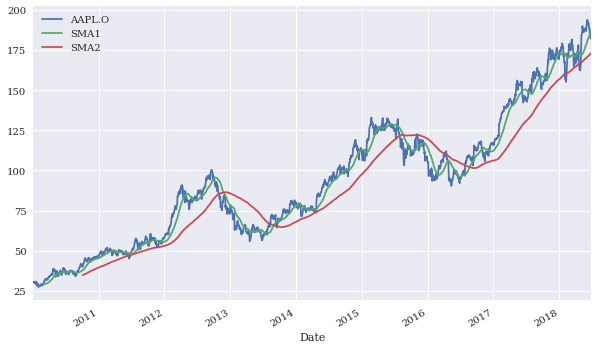

In [10]:
data.plot(figsize=(10,6))

In [11]:
data.dropna(inplace=True)

In [12]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [13]:
data.tail()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2018-06-25,182.17,186.72300,172.744211,1
2018-06-26,184.43,187.20225,172.915474,1
2018-06-27,184.16,187.57875,173.092368,1
2018-06-28,185.50,187.80200,173.262684,1
2018-06-29,185.11,188.00750,173.425211,1


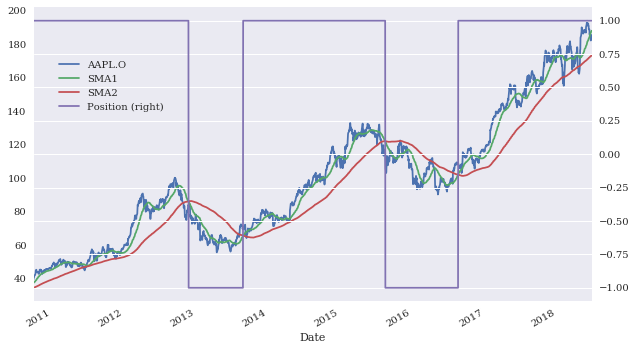

In [14]:
ax = data.plot(secondary_y='Position', figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [15]:
data['Returns'] = np.log(data[symbol]/data[symbol].shift(1))

In [16]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

In [17]:
data.round(4).head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-10-04,39.8057,37.6164,34.6660,1,NaN,NaN
2010-10-05,41.2771,37.7135,34.7223,1,0.0363,0.0363
2010-10-06,41.3128,37.8198,34.7786,1,0.0009,0.0009
2010-10-07,41.3171,37.9592,34.8374,1,0.0001,0.0001
2010-10-08,42.0100,38.1102,34.9002,1,0.0166,0.0166


In [18]:
data.dropna(inplace=True)

In [19]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     4.650342
Strategy    7.175173
dtype: float64

In [20]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.248996
Strategy    0.248792
dtype: float64

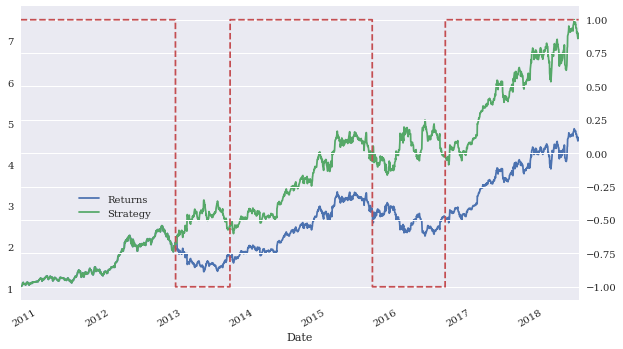

In [21]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.25))

In [22]:
from itertools import product

In [23]:
sma1 = range(20, 60, 4)
sma2 = range(180, 281, 10)

In [24]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2']= data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame({'SMA1' : SMA1, 'SMA2' : SMA2,
                                           'MARKET' : perf['Returns'],
                                           'STRATEGY' : perf['Strategy'],
                                           'OUT' : perf['Strategy'] - perf['Returns']},
                                          index=[0]), ignore_index=True)
    

In [25]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
SMA1        110 non-null int64
SMA2        110 non-null int64
MARKET      110 non-null float64
STRATEGY    110 non-null float64
OUT         110 non-null float64
dtypes: float64(3), int64(2)
memory usage: 4.4 KB


In [26]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
56,40,190,4.650342,7.175173,2.524831
39,32,240,4.045619,6.558690,2.513071
59,40,220,4.220272,6.544266,2.323994
46,36,200,4.074753,6.389627,2.314874
55,40,180,4.574979,6.857989,2.283010
70,44,220,4.220272,6.469843,2.249571
101,56,200,4.074753,6.319524,2.244772


In [27]:
symbol = '.SPX'

In [28]:
data = pd.DataFrame(raw[symbol])

In [29]:
lags = 5
cols = []
for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    data[col] = data[symbol].shift(lag)
    cols.append(col)

In [30]:
data.head(7)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,1132.99,NaN,NaN,NaN,NaN,NaN
2010-01-05,1136.52,1132.99,NaN,NaN,NaN,NaN
2010-01-06,1137.14,1136.52,1132.99,NaN,NaN,NaN
2010-01-07,1141.69,1137.14,1136.52,1132.99,NaN,NaN
2010-01-08,1144.98,1141.69,1137.14,1136.52,1132.99,NaN
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99


In [31]:
data.dropna(inplace=True)

In [32]:
#Linear OLS Regression

In [33]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [34]:
symbol = 'EUR='

In [35]:
data = pd.DataFrame(raw[symbol])

In [36]:
data['returns'] = np.log(data/ data.shift(1))

In [37]:
data.dropna(inplace=True)

In [38]:
data['direction'] = np.sign(data['returns']).astype(int)

In [39]:
data.head()

,EUR=,returns,direction
Date,,,
2010-01-04,1.4411,0.006125,1
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1


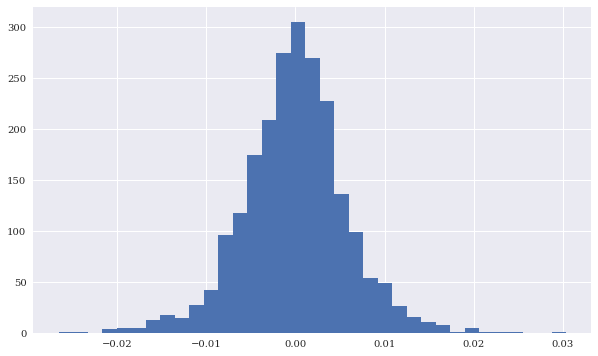

In [40]:
data['returns'].hist(bins=35, figsize=(10,6))

In [41]:
lags = 2

In [42]:
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data[symbol].shift(lag)
        cols.append(col)

In [43]:
create_lags(data)

In [44]:
data.dropna(inplace=True)

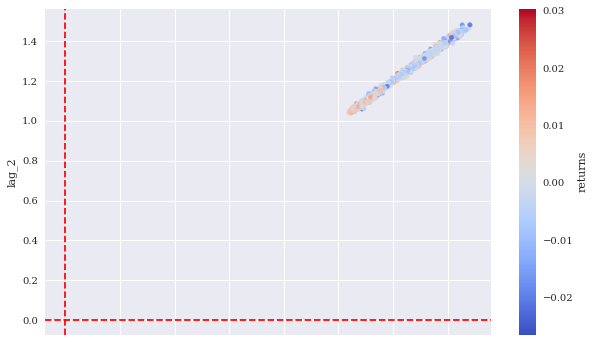

In [45]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns',
                 cmap='coolwarm', figsize=(10,6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')

In [46]:
#Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
data['pos_ols_1'] = model.fit(data[cols],
                             data['returns']).predict(data[cols])

In [50]:
data['pos_ols_2'] = model.fit(data[cols],
                             data['direction']).predict(data[cols])

In [51]:
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-06,-0.000419,0.026107
2010-01-07,-0.000527,-0.013758
2010-01-08,-0.000351,0.049491
2010-01-11,-0.000584,-0.036654
2010-01-12,-0.000612,-0.039920


In [52]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, 0)

In [53]:
data['pos_ols_1'].value_counts()

0    1378
1     835
Name: pos_ols_1, dtype: int64

In [54]:
data['pos_ols_2'].value_counts()

1    1347
0     866
Name: pos_ols_2, dtype: int64

In [55]:
(data['pos_ols_1'].diff() != 0).sum()

202

In [56]:
(data['pos_ols_2'].diff() != 0).sum()

1095

In [57]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']

In [58]:
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

In [59]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        0.813126
strat_ols_1    1.094273
strat_ols_2    1.118111
dtype: float64

In [60]:
(data['direction'] == data['pos_ols_1']).value_counts()

False    1783
True      430
dtype: int64

In [61]:
(data['direction'] == data['pos_ols_2']).value_counts()

False    1510
True      703
dtype: int64

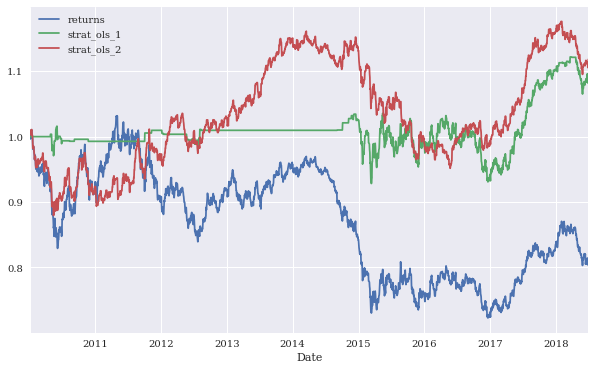

In [62]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [63]:
#clustering

In [64]:
#k-mean

In [65]:
from sklearn.cluster import KMeans

In [66]:
model = KMeans(n_clusters=2, random_state=0)

In [67]:
model.fit(data[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [68]:
data['pos_clus'] = model.predict(data[cols])

In [69]:
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)

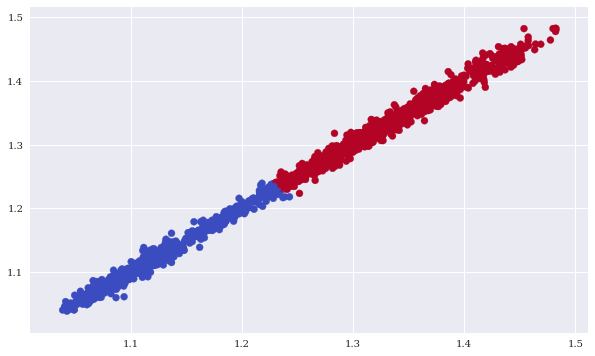

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
           c=data['pos_clus'], cmap='coolwarm');

In [71]:
data['strat_clus'] = data['pos_clus'] * data['returns']

In [72]:
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       0.813126
strat_clus    0.672133
dtype: float64

In [73]:
(data['direction'] == data['pos_clus']).value_counts()

False    1118
True     1095
dtype: int64

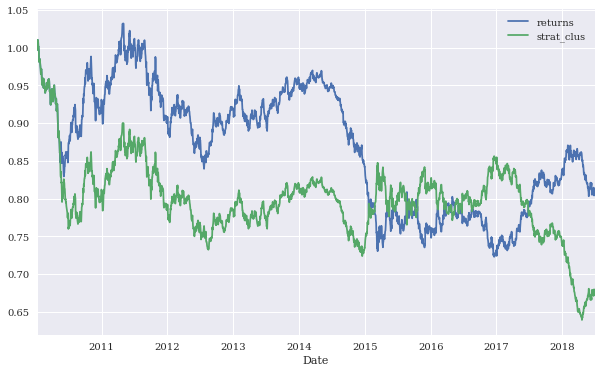

In [74]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [75]:
#frequency approach

In [76]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin=[]
    for col in cols:
        col_bin = col+'_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [77]:
create_bins(data)

In [78]:
data[cols_bin + ['direction']].head()

,lag_1_bin,lag_2_bin,direction
Date,,,
2010-01-06,1,1,1
2010-01-07,1,1,-1
2010-01-08,1,1,1
2010-01-11,1,1,1
2010-01-12,1,1,-1


In [79]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()

lag_1_bin  lag_2_bin  direction
1          1          -1           1092
                       0             11
                       1           1110
dtype: int64

In [96]:
res = grouped['direction'].size().unstack(fill_value=0)

In [97]:
def highlight_max(s):
    is_max = s == s.max
    return ['background-color: yellow' if v else '' for v in is_max]

In [99]:
res.style.apply(highlight_max, axis=1)

,direction,-1,0,1
lag_1_bin,lag_2_bin,,,
1,1,1092,11,1110


In [100]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)

In [101]:
(data['direction'] == data['pos_freq']).value_counts()

False    1121
True     1092
dtype: int64

In [102]:
data['strat_freq'] = data['pos_freq'] * data['returns']

In [103]:
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       0.813126
strat_freq    1.229821
dtype: float64

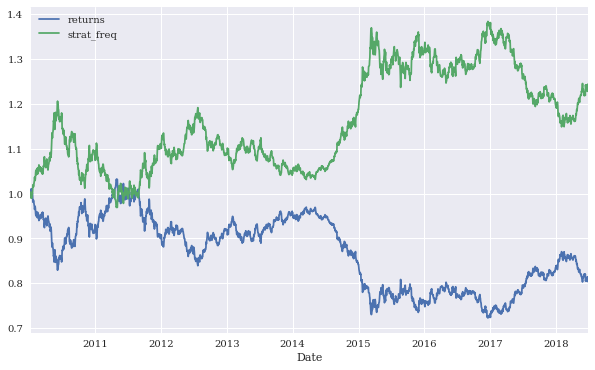

In [104]:
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [80]:
#classification

In [105]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [106]:
C = 1

In [107]:
models = {
    'log_reg':linear_model.LogisticRegression(C=C),
    'gauss_nb':GaussianNB(),
    'svm':SVC(C=C)
    }

In [108]:
def fit_models(data):
    mfit={model: models[model].fit(data[cols_bin],data['direction'])
         for model in models.keys()}

In [109]:
fit_models(data)

C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [110]:
def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

In [111]:
derive_positions(data)

C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


In [112]:
def evaluate_strats(data):
    global sel
    sel= []
    for model in models.keys():
        col = 'strat' + model
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')       

In [113]:
evaluate_strats(data)

In [114]:
sel.insert(1, 'strat_freq')

In [115]:
data[sel].sum().apply(np.exp)

returns          0.813126
strat_freq       1.229821
stratlog_reg     0.813126
stratgauss_nb    1.229821
stratsvm         0.813126
dtype: float64

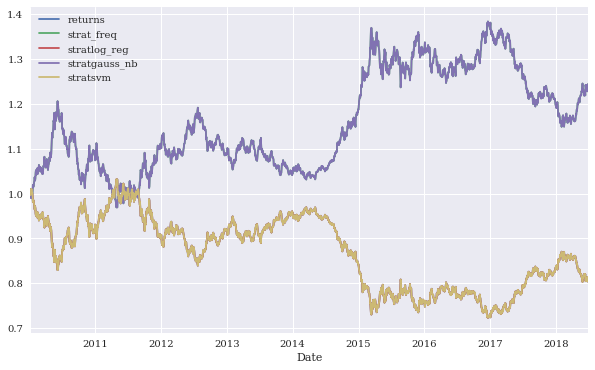

In [116]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

In [117]:
#five binary

In [118]:
data = pd.DataFrame(raw[symbol])

In [119]:
data['returns'] = np.log(data / data.shift(1))

In [120]:
data['direction'] = np.sign(data['returns'])

C:\Users\nickg\Miniconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [125]:
lags = 5
create_lags(data)
data.dropna(inplace=True)

In [126]:
create_bins(data)
cols_bin

['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']

In [128]:
data[cols_bin].head

<bound method NDFrame.head of             lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin
Date                                                             
2010-01-08          1          1          1          1          1
2010-01-11          1          1          1          1          1
2010-01-12          1          1          1          1          1
2010-01-13          1          1          1          1          1
2010-01-14          1          1          1          1          1
...               ...        ...        ...        ...        ...
2018-06-25          1          1          1          1          1
2018-06-26          1          1          1          1          1
2018-06-27          1          1          1          1          1
2018-06-28          1          1          1          1          1
2018-06-29          1          1          1          1          1

[2211 rows x 5 columns]>

In [129]:
data.dropna(inplace=True)

In [130]:
fit_models(data)

C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [132]:
derive_positions(data)

C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\nickg\Miniconda3\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


In [133]:
evaluate_strats(data)

In [134]:
data[sel].sum().apply(np.exp)

returns          0.815966
stratlog_reg     0.815966
stratgauss_nb    1.225541
stratsvm         0.815966
dtype: float64

In [135]:
# five digitized

In [138]:
mu = data['returns'].mean()

In [139]:
v = data['returns'].std()

In [140]:
bins = [mu-v, mu, mu+v]

In [142]:
create_bins(data,bins)

In [144]:
data[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-08,3,3,3,3,3
2010-01-11,3,3,3,3,3
2010-01-12,3,3,3,3,3
2010-01-13,3,3,3,3,3
2010-01-14,3,3,3,3,3


In [146]:
#tensor flow

In [148]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [150]:
fc = [tf.contrib.layers.real_valued_column('lags', dimension=lags)]

In [160]:
model = tf.contrib.learn.DNNClassifier(hidden_units=3*500,
                                      n_classes=len(bins) + 1,
                                       feature_columns = fc)

In [161]:
def input_fn():
    fc = {'lags': tf.constant(data[cols_bin].values)}
    la = tf.constant(data['direction'].apply(lambda x:0 if x<0 else 1).values,
                    shape=[data['direction'].size,1])
    return fc, la

In [168]:
#pg 516
model.fit(input_fn=input_fn, steps=250)

TypeError: 'int' object is not iterable